Objective: \
To create a simulation model which visualizes the movement of people in Phnomh Penh, and the medium of travel they use. 

Machine Learning Model: \
To predict the activity plan / movement pattern of 2,000,000 residents of Phnom Penh, by using the activity plan of 10,000 residents. 

In [1]:
import pandas as pd
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Data Extraction & Cleaning

In [2]:
# EXTRACTION
df_traj = pd.read_csv("trip_traj.csv")
df_od = pd.read_csv("trip_od.csv")
df_vo = pd.read_excel("JICA Tables.xlsx", sheet_name='Table 2.1.10')

print("TRIP OD")
display(df_od.head())
display(df_od.shape)
# display(df_traj.head())
# display(df_traj.shape)

TRIP OD


,Unnamed: 0,id,start_lat,start_lon,end_lat,end_lon,path,time,dt,distance,aver_speed
0,82630,NjdxOTRxNzE5azl0YTo5a2JiMW9lcXFrY2dk,11.54902,104.91924,11.54807,104.93109,"149.0,150.0,151.0,152.0,153.0,154.0,155.0,156....",1689094803,676,2835.936342,4.195172
1,82631,OGppY242cWo4Zm90NjpmZ2JrcG81b2k0cTdq,11.55893,104.90146,11.56971,104.89853,"961.0,962.0,963.0,964.0,965.0,966.0,967.0,968....",1689094812,223,2752.782123,12.344314
2,82632,NGxjNTZiNWhtMW8yazo5dm1ybmpyZXY5dmNx,11.57772,104.88223,11.57468,104.88775,"1678.0,1679.0,1680.0,1681.0,1682.0,1683.0,1684...",1689094818,227,1366.980997,6.021943
3,82633,NmoxOXFidTE2NDE3dTpkajBxMWlzMWVyYWE1,11.59833,104.88362,11.60824,104.89405,"1028.0,1029.0",1689094842,610,1583.232169,2.595463
4,82634,NzEzazAzOGQ0b2hzbzpjY2N2NXNmY3N2ZWV0,11.62541,104.92467,11.63609,104.92019,"297.0,298.0,299.0,300.0,301.0",1689094879,429,1324.683042,3.087839


(44102, 11)

In [3]:
# DATA CLEANING
column_rename = {'Unnamed: 0': 'index'}
df_traj = df_traj.rename(columns=column_rename)
df_od = df_od.rename(columns=column_rename)
df_od = df_od[['index', 'id', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'time', 'dt', 'distance', 'aver_speed']]

# Setting time
# df_od['time'] = pd.to_datetime(df_od['time'], unit='s')
# timezone = pytz.timezone('Etc/GMT+7')
# df_od['time'] = df_od['time'].dt.tz_localize(pytz.utc).dt.tz_convert(timezone)

print("TRIP OD")
display(df_od.head())
display(df_od.shape)


TRIP OD


,index,id,start_lat,start_lon,end_lat,end_lon,time,dt,distance,aver_speed
0,82630,NjdxOTRxNzE5azl0YTo5a2JiMW9lcXFrY2dk,11.54902,104.91924,11.54807,104.93109,1689094803,676,2835.936342,4.195172
1,82631,OGppY242cWo4Zm90NjpmZ2JrcG81b2k0cTdq,11.55893,104.90146,11.56971,104.89853,1689094812,223,2752.782123,12.344314
2,82632,NGxjNTZiNWhtMW8yazo5dm1ybmpyZXY5dmNx,11.57772,104.88223,11.57468,104.88775,1689094818,227,1366.980997,6.021943
3,82633,NmoxOXFidTE2NDE3dTpkajBxMWlzMWVyYWE1,11.59833,104.88362,11.60824,104.89405,1689094842,610,1583.232169,2.595463
4,82634,NzEzazAzOGQ0b2hzbzpjY2N2NXNmY3N2ZWV0,11.62541,104.92467,11.63609,104.92019,1689094879,429,1324.683042,3.087839


(44102, 10)

# Table of Content
1. Generating the Coordinates
2. Generating Average Speed, Distance, and Duration (dt)
3. Generating the Time
4. Generating Transportation Medium
   1. Classification Method
   2. Implementing the Classification Method on the Generated Data
5. Combining Everything

# (1) Generating the Coordinates

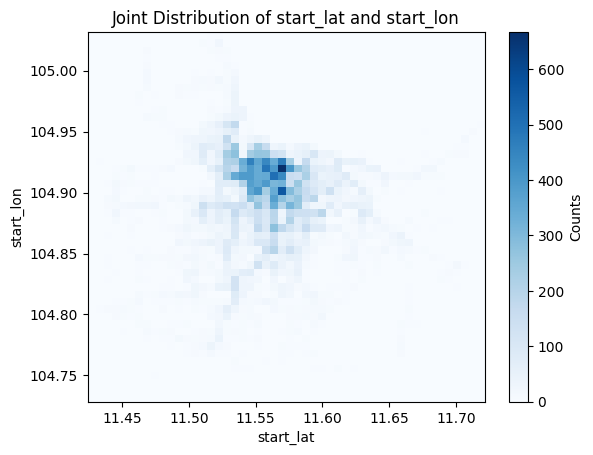

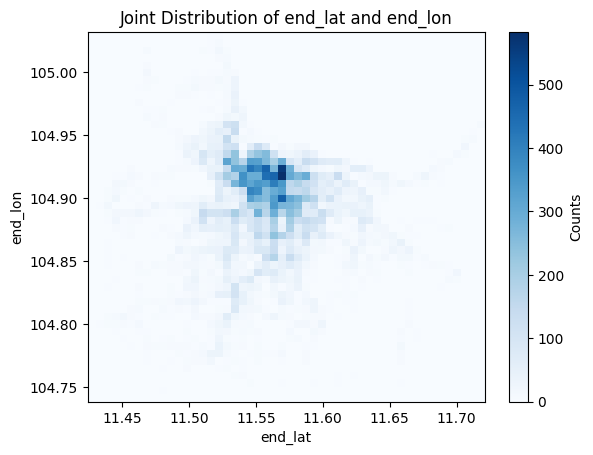

In [4]:
# JOINT DISTRIBUTION: Plotting the joint distribution of start_lat and start_lon, and of end_lat and end_lon 

plt.hist2d(df_od['start_lat'], df_od['start_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Joint Distribution of start_lat and start_lon')
plt.show()
plt.clf()

plt.hist2d(df_od['end_lat'], df_od['end_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Joint Distribution of end_lat and end_lon')
plt.show()

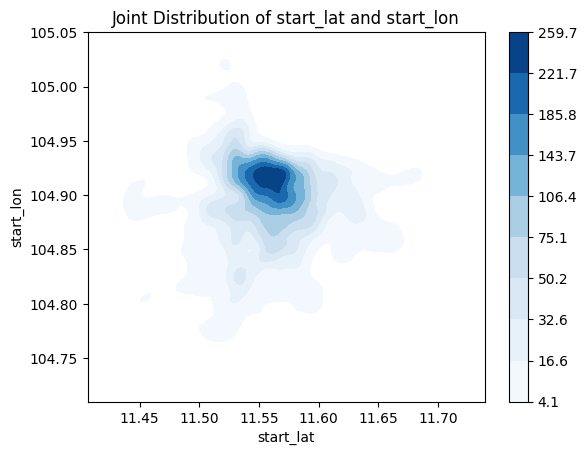

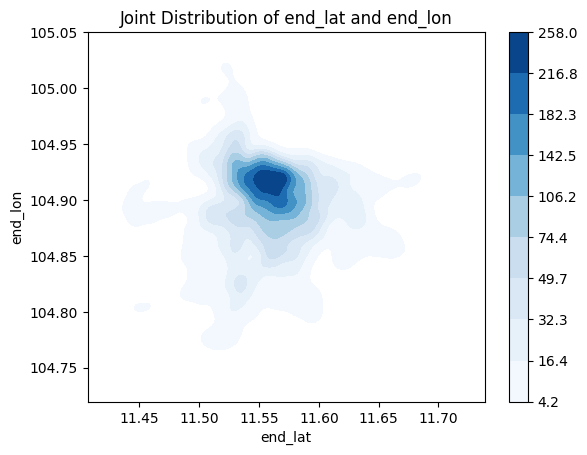

In [5]:
# KDE PLOT: KERNEL DENSITY ESTIMATION

sns.kdeplot(data=df_od, x='start_lat', y='start_lon', cmap='Blues', fill=True, cbar=True)
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Joint Distribution of start_lat and start_lon')
plt.show()

sns.kdeplot(data=df_od, x='end_lat', y='end_lon', cmap='Blues', fill=True, cbar=True)
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Joint Distribution of end_lat and end_lon')
plt.show()

KDE for start_lat and start_lon


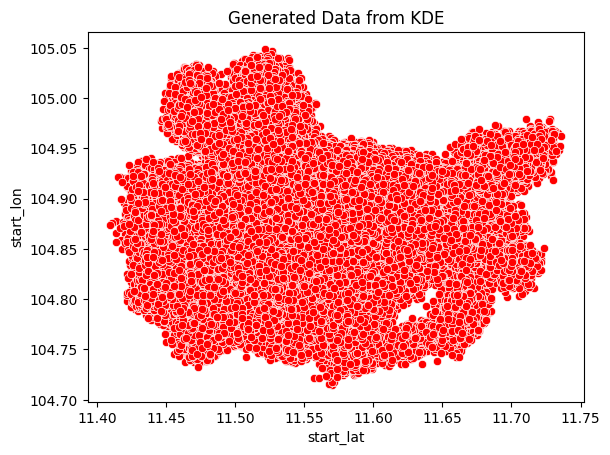

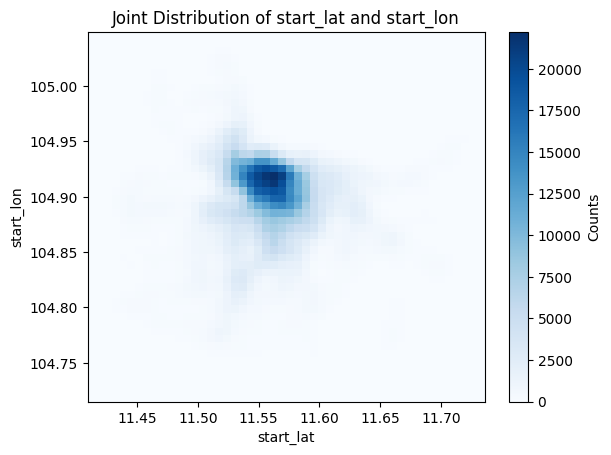

KDE for end_lat and end_lon


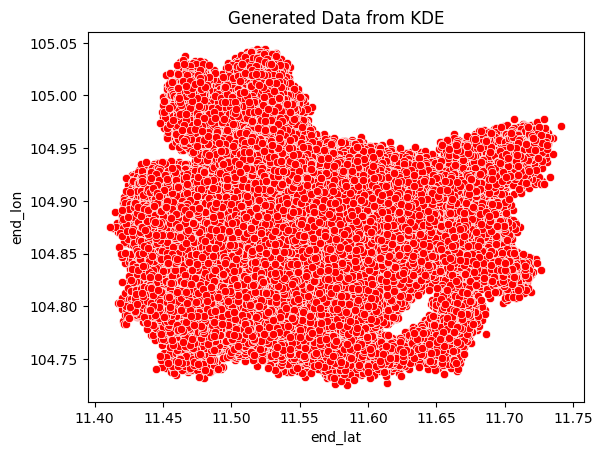

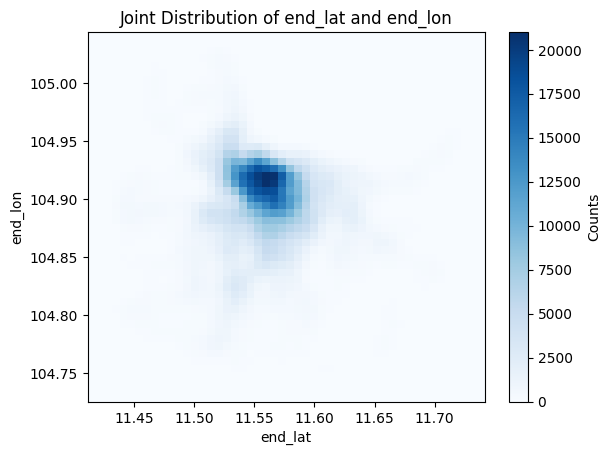

,start_lat,start_lon,end_lat,end_lon
0,11.519466,104.862432,11.540901,104.920940
1,11.562988,104.913703,11.511023,104.881934
2,11.565598,104.893012,11.554726,104.935169
3,11.540824,104.972064,11.578830,104.896194
4,11.589637,104.917052,11.543533,104.929817


In [6]:
# GENERATING THE DATA
from scipy.stats import gaussian_kde
np.random.seed(42)

# =======================
#  START LAT & START LON
# =======================

print("KDE for start_lat and start_lon")

# Generating the KDE
kde = gaussian_kde([df_od['start_lat'], df_od['start_lon']])
num_samples = 2*10**6   
start_new_samples = kde.resample(size=num_samples)
df_start = pd.DataFrame({'start_lat': start_new_samples[0], 'start_lon': start_new_samples[1]})

# Visualizing the generated data
sns.scatterplot(data=df_start, x='start_lat', y='start_lon', color='red')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Generated Data from KDE')
plt.show()

# Visualizing the joint distribution 
plt.hist2d(df_start['start_lat'], df_start['start_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Joint Distribution of start_lat and start_lon')
plt.show()

# =======================
#  END LAT & END LON
# =======================
print("KDE for end_lat and end_lon")

# Generating the KDE
kde = gaussian_kde([df_od['end_lat'], df_od['end_lon']])
num_samples = 2*10**6  
new_samples = kde.resample(size=num_samples)
df_end = pd.DataFrame({'end_lat': new_samples[0], 'end_lon': new_samples[1]})

# Visualizing the generated data
sns.scatterplot(data=df_end, x='end_lat', y='end_lon', color='red')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Generated Data from KDE')
plt.show()

# Visualizing the joint distribution 
plt.hist2d(df_end['end_lat'], df_end['end_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Joint Distribution of end_lat and end_lon')
plt.show()

# CONCATENATION
df_location = pd.merge(df_start, df_end, left_index=True, right_index=True, how='inner')
display(df_location.head())

# (2) Generating Average Speed, Distance, and Duration (dt)

c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


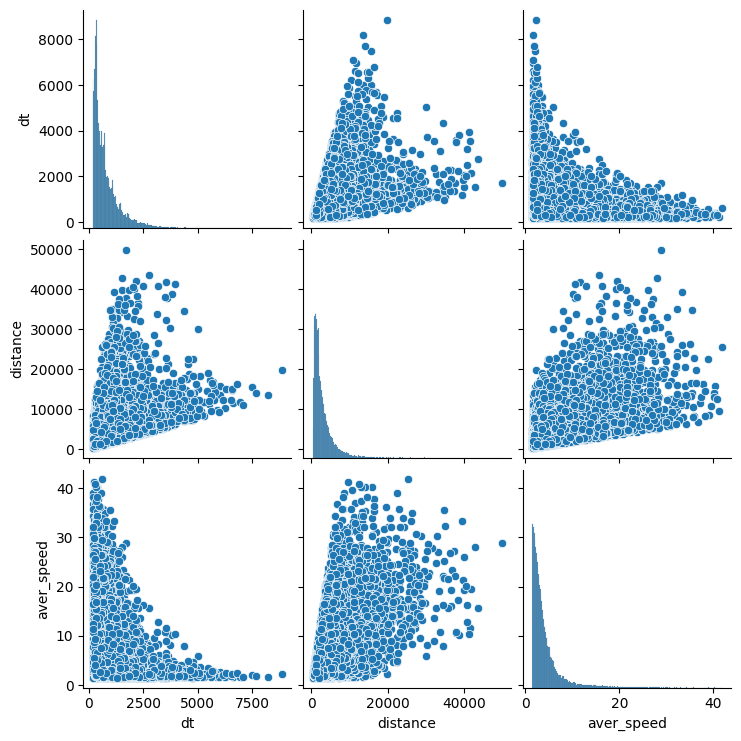

In [7]:
# PAIRPLOT
pairplot_data = df_od[['dt', 'distance', 'aver_speed']] 
myplot = sns.pairplot(data=pairplot_data)

NameError: name 'df_od' is not defined

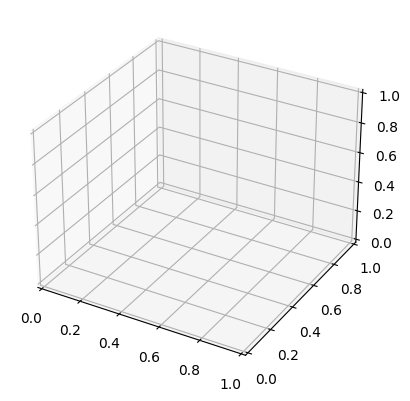

In [1]:
# 3D JOINT DISTRIBUTION
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_od['distance'], df_od['dt'], df_od['aver_speed'], c='blue', marker='o')
# Set labels and title
ax.set_xlabel('distance')
ax.set_ylabel('dt')
ax.set_zlabel('aver_speed')
ax.set_title('3D Joint Distribution')
plt.show()
plt.clf()

# Show another perspective
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_od['aver_speed'], df_od['dt'], df_od['distance'], c='blue', marker='o')
# Set labels and title
ax.set_xlabel('aver_speed')
ax.set_ylabel('dt')
ax.set_zlabel('distance')
ax.set_title('3D Joint Distribution')
plt.show()
plt.clf()

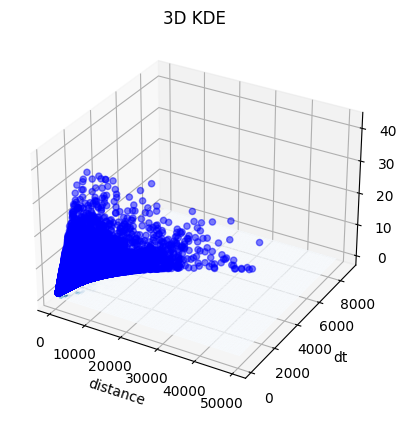

In [9]:
# 3D KDE PDF

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# For 3D KDE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Estimate the 3D kernel density
kde_3d = gaussian_kde([df_od['distance'], df_od['dt'], df_od['aver_speed']])

# Create a meshgrid for plotting
x_grid_3d, y_grid_3d, z_grid_3d = np.meshgrid(np.linspace(df_od['distance'].min(), df_od['distance'].max(), 100),
                                               np.linspace(df_od['dt'].min(), df_od['dt'].max(), 100),
                                               np.linspace(df_od['aver_speed'].min(), df_od['aver_speed'].max(), 100))

# Stack the grids to create input points for KDE
points_3d = np.vstack([x_grid_3d.ravel(), y_grid_3d.ravel(), z_grid_3d.ravel()])

# Calculate the density for the input points
density_3d = kde_3d(points_3d)

# Reshape density to match the shape of the meshgrid
density_3d = density_3d.reshape(x_grid_3d.shape)

# Plot 3D KDE
ax.scatter(df_od['distance'], df_od['dt'], df_od['aver_speed'], c='b', alpha=0.5)  # Scatter plot of data points
ax.plot_trisurf(x_grid_3d.ravel(), y_grid_3d.ravel(), density_3d.ravel(), cmap='Blues', linewidth=0.2)  # Tri-surface plot of KDE
ax.set_xlabel('distance')
ax.set_ylabel('dt')
ax.set_zlabel('aver_speed')
ax.set_title('3D KDE')
plt.show()


In [10]:
# # GENERATING 1000 NEW POINTS
# np.random.seed(42)  

# # Generate new data points from the KDE
# new_points = kde_3d.resample(size=1000)

# # Extract the coordinates of the new points
# new_distance = new_points[0]
# new_dt = new_points[1]
# new_aver_speed = new_points[2]

# # Plot the generated data
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(new_distance, new_dt, new_aver_speed, c='r', marker='o', label='Generated Data')
# ax.set_xlabel('distance')
# ax.set_ylabel('dt')
# ax.set_zlabel('aver_speed')
# ax.set_title('Generated Data from KDE')
# plt.legend()
# plt.show()

# df_ddtas = pd.DataFrame({
#     'distance': new_distance,
#     'dt': new_dt,
#     'aver_speed': new_aver_speed
# })

# display(df_ddtas)

In [11]:
# GENERATING 2,000,000 NEW POINTS
np.random.seed(42)  

# Number of data points to generate
num_points = 2000000

# Initialize arrays to store generated data
new_distance = np.zeros(num_points)
new_dt = np.zeros(num_points)
new_aver_speed = np.zeros(num_points)

# Generate new data points from the KDE
for i in range(num_points):
    # Sample from the KDE
    point = kde_3d.resample(size=1)
    
    # Store the sampled values
    new_distance[i], new_dt[i], new_aver_speed[i] = point[0][0], point[1][0], point[2][0]

# Create a DataFrame to store the generated data
df_speed_distance_dt = pd.DataFrame({
    'distance': new_distance,
    'dt': new_dt,
    'aver_speed': new_aver_speed
})

# Display the DataFrame
display(df_speed_distance_dt.head())
display(df_speed_distance_dt.shape)

,distance,dt,aver_speed
0,444.629809,318.410436,2.306687
1,2498.418870,1537.712119,1.997446
2,8370.154795,511.278771,15.228786
3,1695.192469,593.809660,5.046459
4,1025.438377,262.333684,1.705563


(2000000, 3)

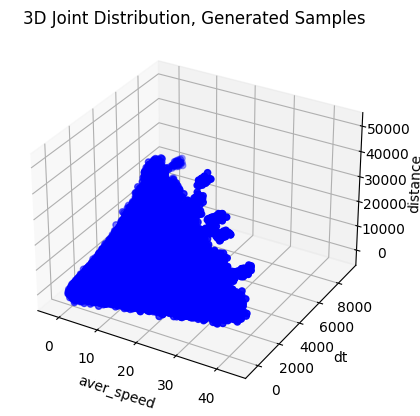

<Figure size 640x480 with 0 Axes>

In [40]:
# DISPLAY

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_speed_distance_dt['aver_speed'], df_speed_distance_dt['dt'], df_speed_distance_dt['distance'], c='blue', marker='o')
# Set labels and title
ax.set_xlabel('aver_speed')
ax.set_ylabel('dt')
ax.set_zlabel('distance')
ax.set_title('3D Joint Distribution, Generated Samples')
plt.show()
plt.clf()

# (3) Generating the Time

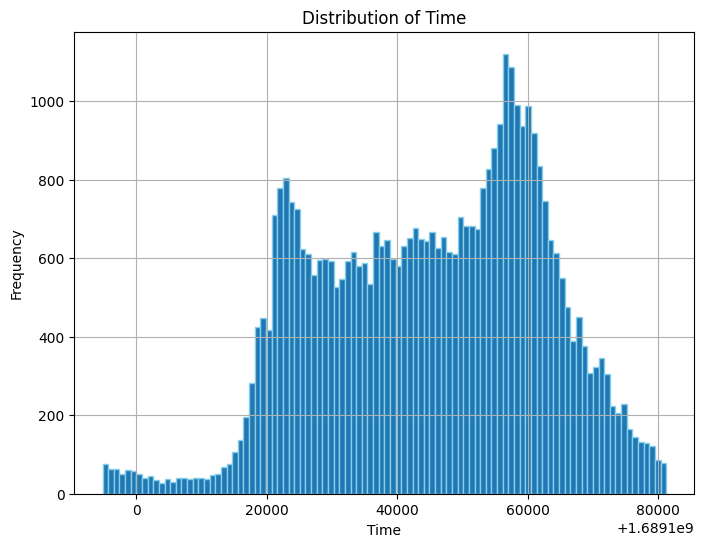

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_od' is your DataFrame containing the 'time' field
# Extract the time data from the DataFrame
time_data = df_od['time']

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(time_data, bins=100, edgecolor='skyblue')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')
plt.grid(True)
plt.show()


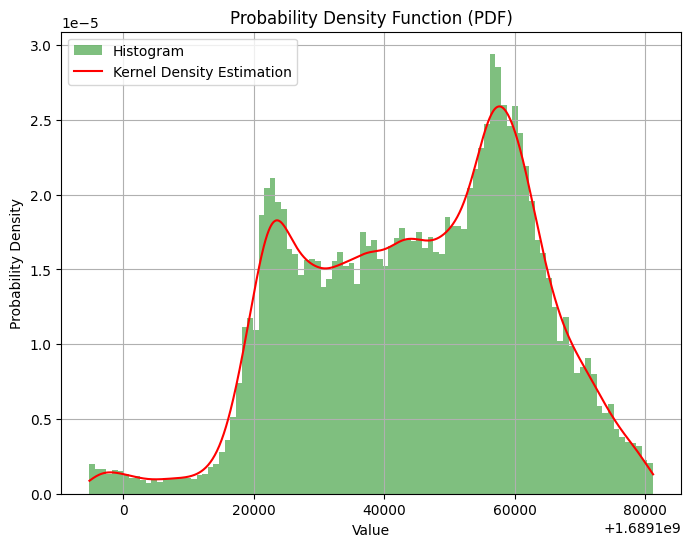

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Convert datetime values to timestamps
distribution_samples = df_od['time'].values.astype(np.int64) 

# KDE estimation
kde = gaussian_kde(distribution_samples)

# Generate x values for plotting
x_min = distribution_samples.min()
x_max = distribution_samples.max()
x_values = np.linspace(x_min, x_max, 1000)

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(distribution_samples, bins=100, density=True, alpha=0.5, color='g', label='Histogram')

# Plot KDE
plt.plot(x_values, kde(x_values), 'r', label='Kernel Density Estimation')

plt.title('Probability Density Function (PDF)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



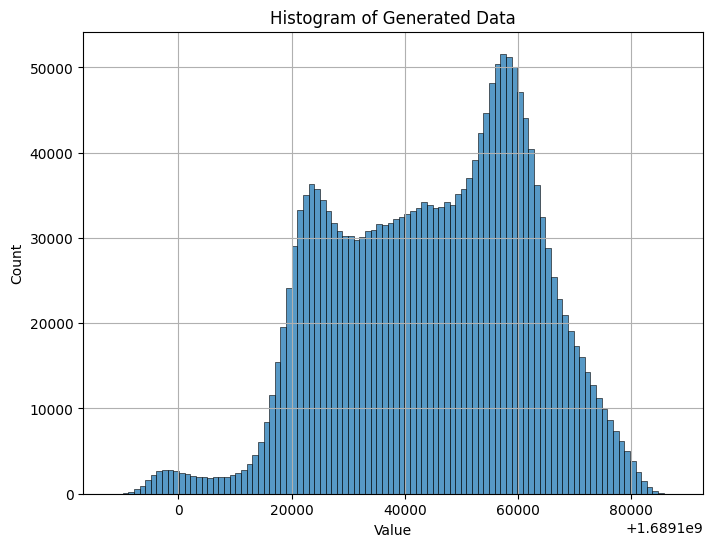

,time
0,1.689139e+09
1,1.689161e+09
2,1.689130e+09
3,1.689151e+09
4,1.689135e+09


(2000000, 1)

In [14]:
import seaborn as sns
import pandas as pd
np.random.seed(42)

# Generate new data points using the estimated KDE
new_data_points = kde.resample(size=2000000)

# Convert NumPy array to DataFrame
df_new_data = pd.DataFrame({'time': new_data_points.flatten()})

# Plotting
plt.figure(figsize=(8, 6))
sns.histplot(x='time', data=df_new_data, bins=100) 
plt.title('Histogram of Generated Data')
plt.xlabel('Value')
plt.ylabel('Count')
plt.grid(True)
plt.show()

display(df_new_data.head())
display(df_new_data.shape)

# (4) Generating Transportation Medium

### Classification Method

In [15]:
# SCATTERPLOT TOOL: 
    # Plots 2d histogram of distance, dt, and aver_speed
    # Plots 3d scatterplot of distance, dt, and aver_speed

def plot_scatter(df_plot): 
    features = ['distance', 'dt', 'aver_speed']
    for feature in features:     
        sns.histplot(x=feature, data=df_plot, bins=100) 
        plt.title(f"Histogram of {feature} Data")
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()
        plt.clf()

    # Plot 3D scatter plot
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_plot['distance'], df_plot['dt'], df_plot['aver_speed'], c='blue', marker='o')
    # Set labels and title
    ax.set_xlabel('distance')
    ax.set_ylabel('dt')
    ax.set_zlabel('aver_speed')
    ax.set_title('3D Joint Distribution')
    plt.show()
    plt.clf()

    # another perspective
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_plot['aver_speed'], df_plot['distance'], df_plot['dt'], c='blue', marker='o')
    # Set labels and title
    ax.set_xlabel('aver_speed')
    ax.set_ylabel('distance')
    ax.set_zlabel('dt')
    ax.set_title('3D Joint Distribution')
    plt.show()
    plt.clf()


In [16]:
# JICA TABLE

df_vo.at[0, 'Mode'] = 'Walking'
df_vo.at[1, 'Mode'] = 'Motorcycle'
df_vo.at[2, 'Mode'] = 'Motorcycle'
df_vo.at[3, 'Mode'] = 'Car'

display(df_vo)

n_motorcycle = df_vo.at[1, 'Number of Households (2019)'] + 2*df_vo.at[2, 'Number of Households (2019)']
n_car = df_vo.at[3, 'Number of Households (2019)']

print(f"Number of Cars: {n_car}")
print(f"Number of Motorcycles: {n_motorcycle}")
print(f"Theoretical Percentage of Cars (over all motorized vehicles): {n_car / (n_car + n_motorcycle)}")
print(f"Theoretical Percentage of Motorcycle (over all motorized vehicles): {n_motorcycle / (n_car + n_motorcycle)}")

,Vehicle Ownership,Number of Households (2019),Percentage,Mode
0,No Vehicles,53947,0.108,Walking
1,1 Motorcycles,181426,0.363,Motorcycle
2,2 Motorcycles or more,132116,0.265,Motorcycle
3,Car,131810,0.264,Car


Number of Cars: 131810
Number of Motorcycles: 445658
Theoretical Percentage of Cars (over all motorized vehicles): 0.22825507214252563
Theoretical Percentage of Motorcycle (over all motorized vehicles): 0.7717449278574744


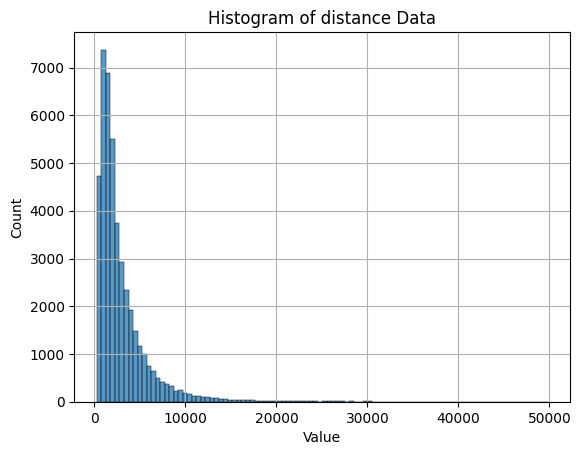

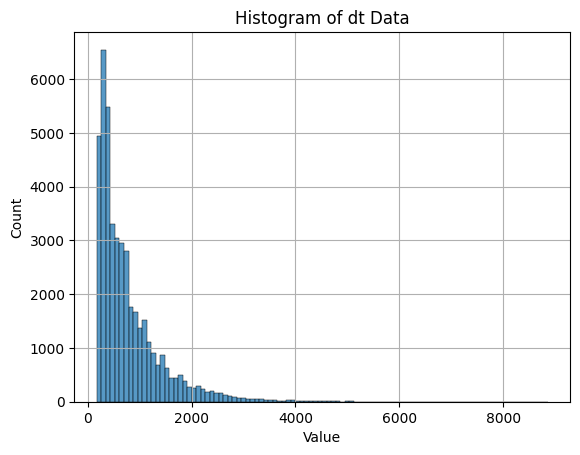

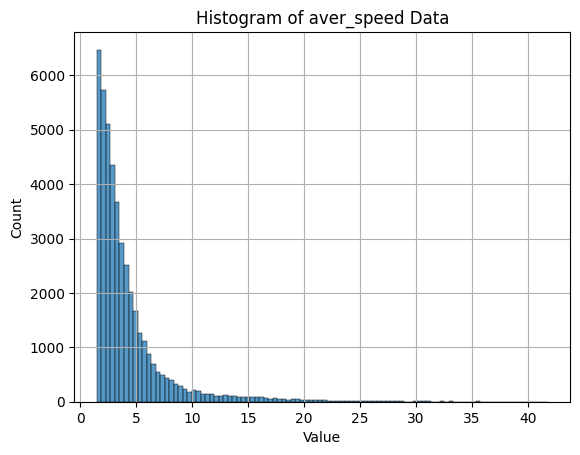

<Figure size 640x480 with 0 Axes>

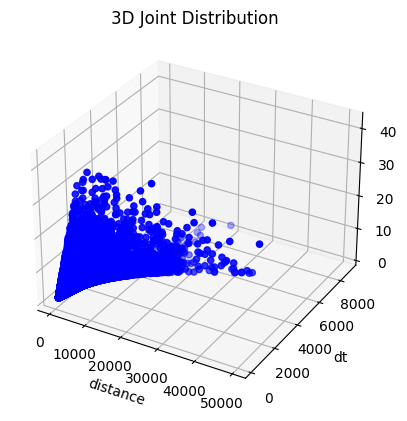

<Figure size 640x480 with 0 Axes>

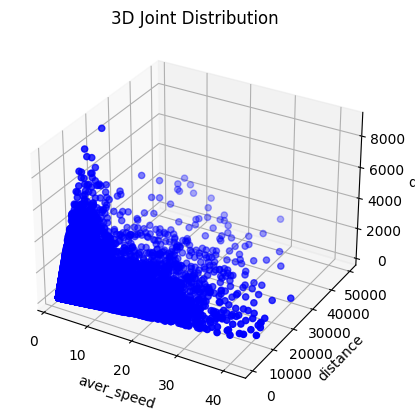

<Figure size 640x480 with 0 Axes>

In [17]:
# DATA VISUALIZATION
plot_scatter(df_od)

WALKING \
average distance: 650 - 800 meters \
median distance: 400 - 550 meters

MOTORIZED VEHICLES \
average distance: 3000 meters \
average time: above 11 mins \
median distance: 2000 meters \
median time: 7-8 mins 

Keep in mind that there are 3 times more motorized vehicles than pedestrians.



,index,id,start_lat,start_lon,end_lat,end_lon,time,dt,distance,aver_speed,medium
5,82635,OThobm9ibjA5c2dxczpjMTl2dTZiaTRmZHRi,11.54532,104.90983,11.53125,104.91041,1689094910,762,1569.981554,2.060343,walking
7,82637,M2U3cm1jOG5nYTh0MjpjaDM0ZGxjM29tYmYz,11.62182,104.90549,11.61945,104.90802,1689094924,267,402.596915,1.507854,walking
8,82638,OXN2MW1jaDM3cTUwaDo2bjl1dmlxajdiYnM=,11.56836,104.81024,11.57195,104.80660,1689094925,195,562.659246,2.885432,walking
10,82640,YTN0YjY5ZmpkODg0aDo5ZHE3aHN2Zm83ZXVu,11.56321,104.88853,11.56374,104.88922,1689094965,206,338.541250,1.643404,walking
14,82644,ZG41NHI1aWNoOGJpZjo5NnJvOGNrZWM0bjRs,11.55210,104.93680,11.54801,104.93114,1689095002,318,777.190381,2.443995,walking
...,...,...,...,...,...,...,...,...,...,...,...
44087,126717,M3IxODIyNmM4ZHN0ZDpkNXJubW03MzBsYnZw,11.51165,104.92883,11.51087,104.93549,1689181030,301,764.027858,2.538299,walking
44094,126724,NWluYXBiMHQzZHFvMjpkcmQ5amdhbmRscnEy,11.55556,104.88051,11.54854,104.90757,1689181064,1853,3379.529845,1.823815,walking
44095,126725,OGJtZTlxbWZzZjFqbTo4NjE0MjRtcG1rbTYw,11.55261,104.89471,11.54978,104.89606,1689181089,669,1075.837253,1.608127,walking
44096,126726,OTBvZ2E0NmFsdTBuMDo0bWMxdWoyM2cyZ2g1,11.56274,104.87984,11.56731,104.88307,1689181135,315,618.563298,1.963693,walking


percentage walking: 0.2574259670763231


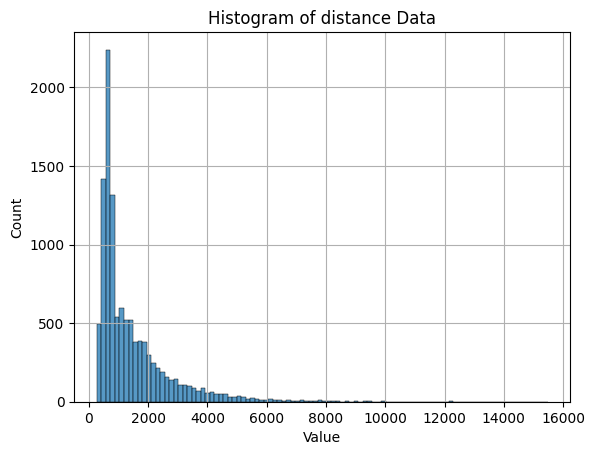

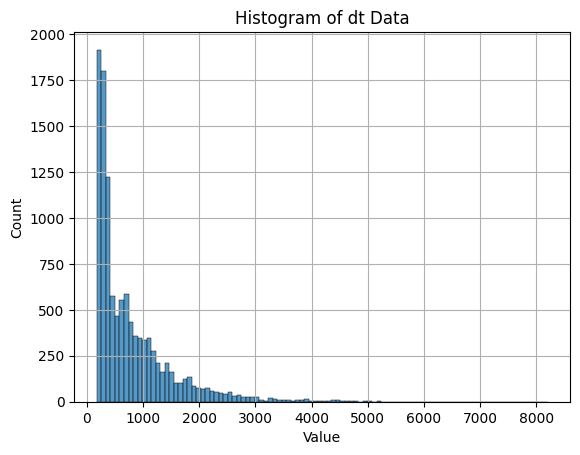

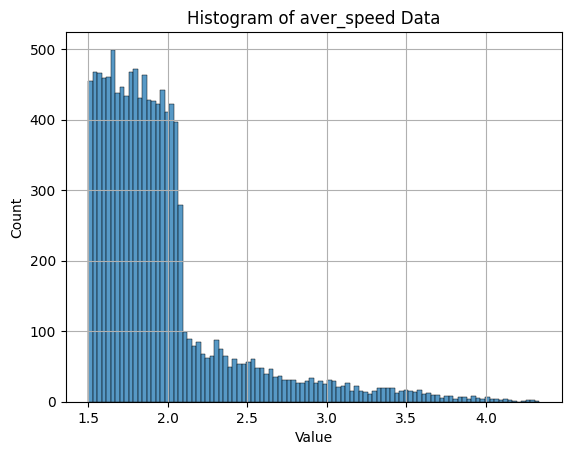

<Figure size 640x480 with 0 Axes>

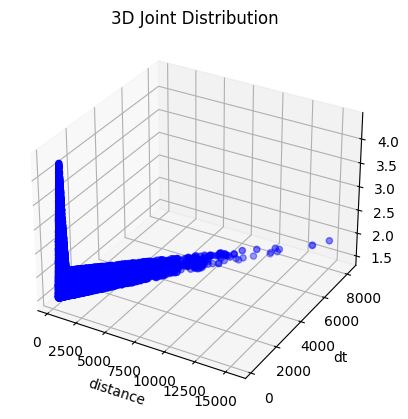

<Figure size 640x480 with 0 Axes>

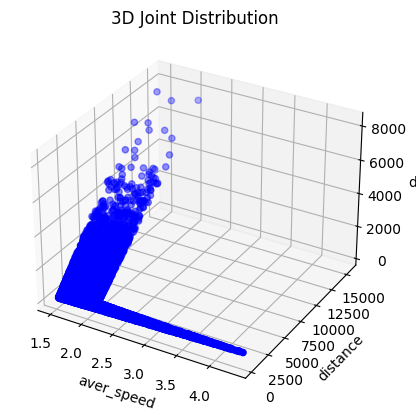

<Figure size 640x480 with 0 Axes>

In [18]:
# MEDIUM: WALKING

# Assumptions
    # distance <= 800 m, OR
    # speed <= 7.5 kph

speed_kph = 7.5
speed_mps = speed_kph * (1000/3600)

walking_condition = ( (df_od['distance'] <= 800) | (df_od['aver_speed'] <= speed_mps) ) 
df_walking = df_od.loc[walking_condition, :].copy(deep=True)
df_walking.loc[:, 'medium'] = 'walking'
display(df_walking)

percentage_walking = len(df_walking) / len(df_od) 
print(f"percentage walking: {percentage_walking}")

plot_scatter(df_walking)

,index,id,start_lat,start_lon,end_lat,end_lon,time,dt,distance,aver_speed
0,82630,NjdxOTRxNzE5azl0YTo5a2JiMW9lcXFrY2dk,11.54902,104.91924,11.54807,104.93109,1689094803,676,2835.936342,4.195172
1,82631,OGppY242cWo4Zm90NjpmZ2JrcG81b2k0cTdq,11.55893,104.90146,11.56971,104.89853,1689094812,223,2752.782123,12.344314
2,82632,NGxjNTZiNWhtMW8yazo5dm1ybmpyZXY5dmNx,11.57772,104.88223,11.57468,104.88775,1689094818,227,1366.980997,6.021943
3,82633,NmoxOXFidTE2NDE3dTpkajBxMWlzMWVyYWE1,11.59833,104.88362,11.60824,104.89405,1689094842,610,1583.232169,2.595463
4,82634,NzEzazAzOGQ0b2hzbzpjY2N2NXNmY3N2ZWV0,11.62541,104.92467,11.63609,104.92019,1689094879,429,1324.683042,3.087839


(32749, 10)

CARS


,index,id,start_lat,start_lon,end_lat,end_lon,time,dt,distance,aver_speed
23,82653,NHZnMDMxbTIzcnZtZjpib2tucGxlM2U0MTlm,11.56998,104.92772,11.54000,104.89746,1689095128,1238,7834.363753,6.328242
26,82656,NTVmOWJ2djA5amhrNzplaWxhYjRtcGkwODZs,11.56217,104.92168,11.56305,104.89185,1689095150,851,8868.558583,10.421338
37,82667,MzRtdDd0NmNrb2tpZjo5aGVudnY3dWVmb3Nu,11.56725,104.92710,11.55355,104.93647,1689095266,1109,5545.289695,5.000261
46,82676,OHZhc2J2MHZhZm5zZzo2dHJqNHJmcjU0dDZn,11.54849,104.90652,11.52135,104.88847,1689095353,1655,4344.593466,2.625132
52,82682,NW5iMXFvMW9kYW1pbDo4ZmdmdDFwdjd2dXQ0,11.56140,104.91169,11.55606,104.94065,1689095404,1537,7522.899206,4.894534
...,...,...,...,...,...,...,...,...,...,...
44077,126707,ZHE4ZmNhdW1lcmxubzpjZDhwZjBkNjlxdjIw,11.54401,104.92066,11.54761,104.90734,1689180867,319,6494.953642,20.360356
44082,126712,ZHU3aDB0MjdnMWY2MjpjcG85ZmY1a3Awbjhk,11.57583,104.92421,11.56289,104.86948,1689180955,1138,9575.826502,8.414610
44083,126713,dWZnMTI3ajVxc2RhOmU1ZnBldWc1dnJqdm8=,11.55805,104.91713,11.54809,104.89686,1689180967,1449,5033.277689,3.473622
44085,126715,NnM1dDVqYzFydnBrOmQxbTNwaXBwdG1pcm8=,11.55999,104.93528,11.57280,104.90758,1689180983,524,12111.029430,23.112652


percentage car: 0.19359666228288966
percentage car over motorized vehicles: 0.2607102506946777


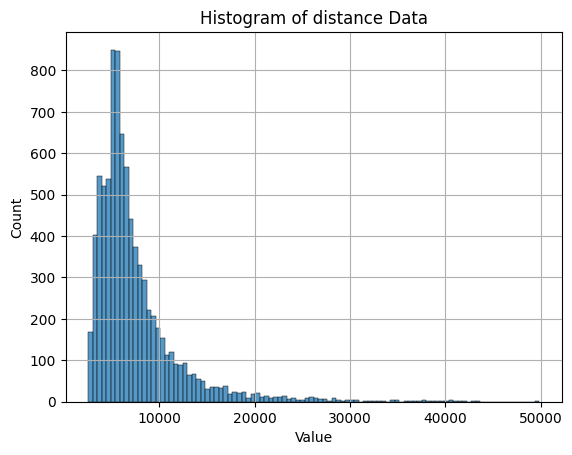

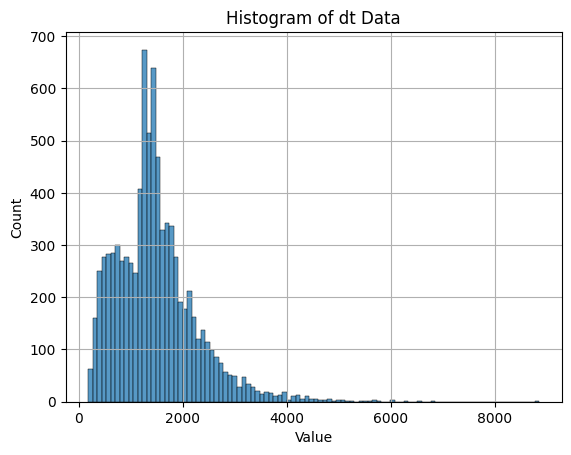

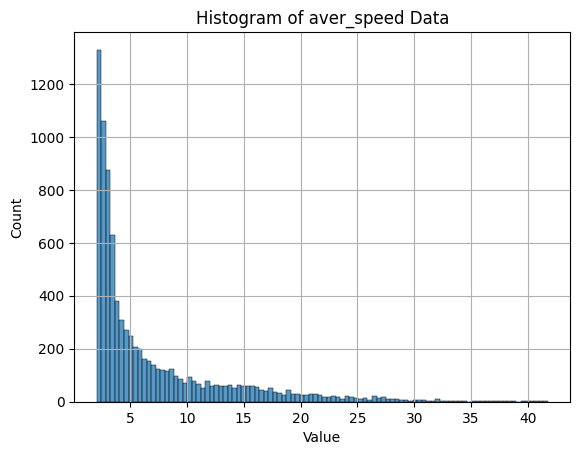

<Figure size 640x480 with 0 Axes>

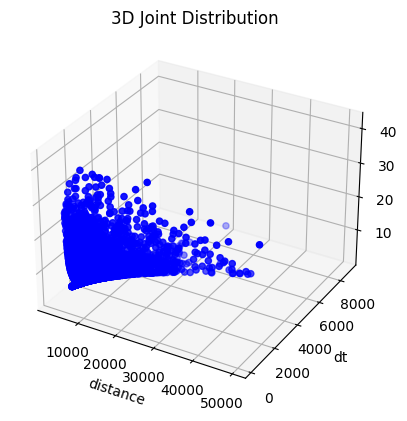

<Figure size 640x480 with 0 Axes>

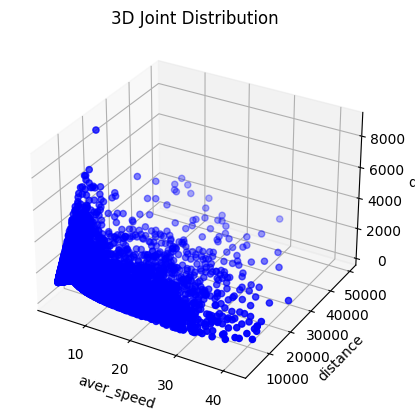

<Figure size 640x480 with 0 Axes>

In [19]:
# MEDIUM: NON-WALKING, CAR

remaining_condition = ~(walking_condition)
df_remaining = df_od.loc[remaining_condition, :].copy(deep=True)
display(df_remaining.head())
display(df_remaining.shape)

# time to classify df_remaining into cars, motorcycles, and tuktuks
print("CARS")
car_condition = ((df_remaining['aver_speed'] >= 30) | (df_remaining['distance'] >= 5000) | (df_remaining['dt'] >= 20*60 ))
df_car = df_remaining.loc[car_condition, : ].copy(deep=True)
display(df_car)

percentage_car = len(df_car) / len(df_od)
print(f"percentage car: {percentage_car}")
percentage_car_per_motorized = len(df_car) / len(df_remaining)
print(f"percentage car over motorized vehicles: {percentage_car_per_motorized}")

plot_scatter(df_car)

MOTORCYCLE


,index,id,start_lat,start_lon,end_lat,end_lon,time,dt,distance,aver_speed
0,82630,NjdxOTRxNzE5azl0YTo5a2JiMW9lcXFrY2dk,11.54902,104.91924,11.54807,104.93109,1689094803,676,2835.936342,4.195172
1,82631,OGppY242cWo4Zm90NjpmZ2JrcG81b2k0cTdq,11.55893,104.90146,11.56971,104.89853,1689094812,223,2752.782123,12.344314
2,82632,NGxjNTZiNWhtMW8yazo5dm1ybmpyZXY5dmNx,11.57772,104.88223,11.57468,104.88775,1689094818,227,1366.980997,6.021943
3,82633,NmoxOXFidTE2NDE3dTpkajBxMWlzMWVyYWE1,11.59833,104.88362,11.60824,104.89405,1689094842,610,1583.232169,2.595463
4,82634,NzEzazAzOGQ0b2hzbzpjY2N2NXNmY3N2ZWV0,11.62541,104.92467,11.63609,104.92019,1689094879,429,1324.683042,3.087839
...,...,...,...,...,...,...,...,...,...,...
44093,126723,YXVsNDdwMDJraWEwZTplc3IwbGphbXVhZmlv,11.52271,104.92920,11.53225,104.93253,1689181060,346,1121.129154,3.240258
44097,126727,M2Nncm84c25vMTJkcjo0ZHRuYjRqZzNrOW9h,11.61500,104.91571,11.61807,104.92268,1689181152,251,832.375487,3.316237
44098,126728,ZWVqZWFoOWpicDF1bjpkN2F1OG04ZW0zdTkw,11.45429,104.80949,11.45052,104.80337,1689181155,812,1940.442877,2.389708
44099,126729,Ymp0Ym81MTlhZXBmcjplcXRmcXYyZGw1dDly,11.57598,104.87503,11.57347,104.87720,1689181191,302,1233.635832,4.084887


percentage motorcycle: 0.5489773706407872
percentage motorcycle over motorized vehicles: 0.7392897493053223


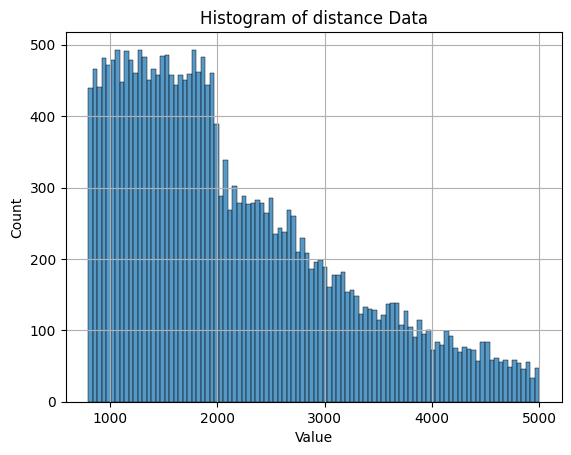

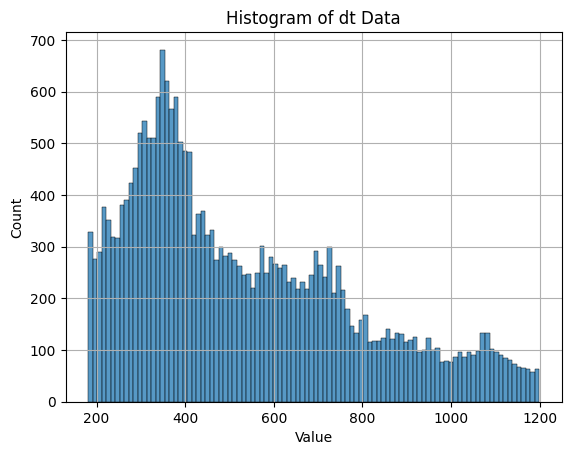

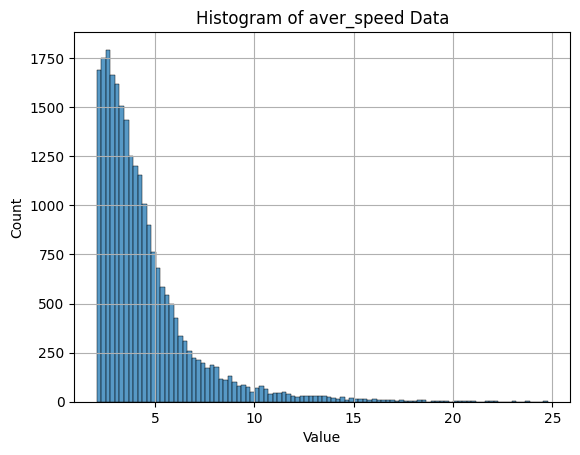

<Figure size 640x480 with 0 Axes>

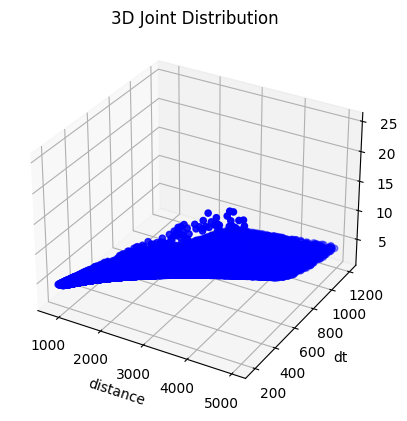

<Figure size 640x480 with 0 Axes>

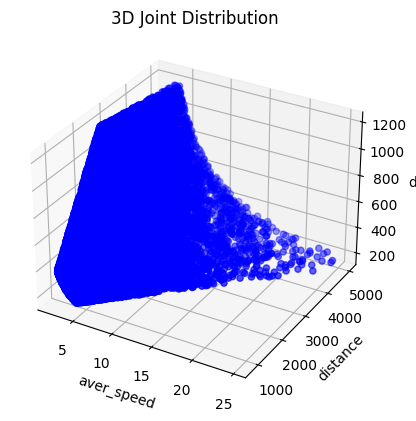

<Figure size 640x480 with 0 Axes>

In [20]:
# MEDIUM: NON-WALKING, MOTORCYCLE

print("MOTORCYCLE")
motorcycle_condition =  ~(car_condition)
df_motorcycle = df_remaining.loc[ motorcycle_condition, : ].copy(deep=True)
display(df_motorcycle)

percentage_motorcycle = len(df_motorcycle) / len(df_od)
print(f"percentage motorcycle: {percentage_motorcycle}")
percentage_motorcycle_per_motorized = len(df_motorcycle) / len(df_remaining)
print(f"percentage motorcycle over motorized vehicles: {percentage_motorcycle_per_motorized}")

plot_scatter(df_motorcycle)

In [21]:
# SUMMARY

print(f"Number of Pedestrians: {len(df_walking)}")
print(f"Number of Cars: {len(df_car)}")
print(f"Number of Motorcycles: {len(df_motorcycle)}")

print(f"Percentage of Pedestrians: {len(df_walking) / len(df_od)}")
print(f"Percentage of Cars: {len(df_car) / len(df_od)}")
print(f"Percentage of Motorcycles: {len(df_motorcycle) / len(df_od)}")

Number of Pedestrians: 11353
Number of Cars: 8538
Number of Motorcycles: 24211
Percentage of Pedestrians: 0.2574259670763231
Percentage of Cars: 0.19359666228288966
Percentage of Motorcycles: 0.5489773706407872


### Implementing the Classification Method on the Generated Data

In [30]:
# CLASSIFYING

display(df_speed_distance_dt)

walking_condition = ( (df_speed_distance_dt['distance'] <= 800) | (df_speed_distance_dt['aver_speed'] <= speed_mps) ) 
df_generated_walking = df_speed_distance_dt.loc[walking_condition, :].copy(deep=True)
print(f"Walking: {len(df_generated_walking)}, {100 * len(df_generated_walking) / len(df_speed_distance_dt)}%")
display(df_generated_walking)

remaining_condition = ~(walking_condition)
df_generated_remaining = df_speed_distance_dt.loc[remaining_condition, :].copy(deep=True)

car_condition = ((df_generated_remaining['aver_speed'] >= 30) | (df_generated_remaining['distance'] >= 5000) | (df_generated_remaining['dt'] >= 20*60 ))
df_generated_car = df_generated_remaining.loc[car_condition, :].copy(deep=True)
print(f"Car: {len(df_generated_car)}, {100 * len(df_generated_car) / len(df_speed_distance_dt)}%")
display(df_generated_car)

motorcycle_condition =  ~(car_condition)
df_generated_motorcycle = df_generated_remaining.loc[motorcycle_condition, :].copy(deep=True)
print(f"Motorcycle: {len(df_generated_motorcycle)}, {100 * len(df_generated_motorcycle) / len(df_speed_distance_dt)}%")
display(df_generated_motorcycle)

,distance,dt,aver_speed
0,444.629809,318.410436,2.306687
1,2498.418870,1537.712119,1.997446
2,8370.154795,511.278771,15.228786
3,1695.192469,593.809660,5.046459
4,1025.438377,262.333684,1.705563
...,...,...,...
1999995,8292.290398,532.543514,15.900457
1999996,738.594262,397.579387,2.181051
1999997,1330.697917,599.710176,2.452723
1999998,1629.643493,468.766778,2.404204


Walking: 599528, 29.9764%


,distance,dt,aver_speed
0,444.629809,318.410436,2.306687
1,2498.418870,1537.712119,1.997446
4,1025.438377,262.333684,1.705563
10,4541.116629,1894.761461,1.162031
12,5989.972446,2225.345959,1.929814
...,...,...,...
1999975,324.181715,200.857707,2.412652
1999977,270.443895,282.516769,3.094659
1999984,878.516970,662.751872,1.124523
1999986,-71.631879,114.524343,2.082127


Car: 388899, 19.44495%


,distance,dt,aver_speed
2,8370.154795,511.278771,15.228786
5,4427.724075,1499.292930,3.276715
6,11614.995936,1731.587052,6.369484
9,3811.815783,1367.309127,3.022025
13,5986.039556,1816.544242,2.726495
...,...,...,...
1999989,5750.901148,1711.353852,3.564978
1999991,32613.817297,1161.616778,26.772026
1999993,10921.553928,1362.516513,8.869839
1999994,10485.077736,5133.873377,2.714074


Motorcycle: 1011573, 50.57865%


,distance,dt,aver_speed
3,1695.192469,593.809660,5.046459
7,1348.448163,809.945102,2.086278
8,2018.550927,617.161857,3.153056
11,964.760943,223.774328,4.561379
14,1935.496785,303.983378,6.937522
...,...,...,...
1999990,2435.479103,807.550029,4.086012
1999992,966.873132,351.991018,3.421202
1999997,1330.697917,599.710176,2.452723
1999998,1629.643493,468.766778,2.404204


In [41]:
# SUMMARY
print(f"Walking: {len(df_generated_walking)}, {100 * len(df_generated_walking) / len(df_speed_distance_dt)}%")
print(f"Car: {len(df_generated_car)}, {100 * len(df_generated_car) / len(df_speed_distance_dt)}%")
print(f"Motorcycle: {len(df_generated_motorcycle)}, {100 * len(df_generated_motorcycle) / len(df_speed_distance_dt)}%")

Walking: 599528, 29.9764%
Car: 388899, 19.44495%
Motorcycle: 1011573, 50.57865%


In [34]:
# LABELLING & MERGING 

df_generated_walking['Medium'] = 'Walking'
df_generated_car['Medium'] = 'Car'
df_generated_motorcycle['Medium'] = 'Motorcycle'

display(df_generated_walking.head())
display(df_generated_car.head())
display(df_generated_motorcycle.head())

df_speed_distance_dt = pd.merge(df_generated_walking, df_generated_car, how='outer')
df_speed_distance_dt = pd.merge(df_speed_distance_dt, df_generated_motorcycle, how='outer')
display(df_speed_distance_dt)

,distance,dt,aver_speed,Medium
0,444.629809,318.410436,2.306687,Walking
1,2498.418870,1537.712119,1.997446,Walking
4,1025.438377,262.333684,1.705563,Walking
10,4541.116629,1894.761461,1.162031,Walking
12,5989.972446,2225.345959,1.929814,Walking


,distance,dt,aver_speed,Medium
2,8370.154795,511.278771,15.228786,Car
5,4427.724075,1499.292930,3.276715,Car
6,11614.995936,1731.587052,6.369484,Car
9,3811.815783,1367.309127,3.022025,Car
13,5986.039556,1816.544242,2.726495,Car


,distance,dt,aver_speed,Medium
3,1695.192469,593.809660,5.046459,Motorcycle
7,1348.448163,809.945102,2.086278,Motorcycle
8,2018.550927,617.161857,3.153056,Motorcycle
11,964.760943,223.774328,4.561379,Motorcycle
14,1935.496785,303.983378,6.937522,Motorcycle


,distance,dt,aver_speed,Medium
0,-2431.467806,-169.868390,0.993514,Walking
1,-2413.397949,-261.042228,1.632100,Walking
2,-2377.634998,426.424882,-2.219026,Walking
3,-2342.386656,87.889855,-0.690934,Walking
4,-2295.939473,-218.693145,1.273308,Walking
...,...,...,...,...
1999995,50538.449251,1637.652952,29.983949,Car
1999996,50680.657916,1867.901385,28.719271,Car
1999997,51112.148843,1757.085664,30.368710,Car
1999998,51288.762964,1708.372970,30.703646,Car


# (5) Combining Everything

In [35]:
df_final = pd.merge(df_location, df_speed_distance_dt, left_index=True, right_index=True, how='inner')
df_final = pd.merge(df_final, df_new_data, left_index=True, right_index=True, how='inner')
df_final.to_csv('generated_data.txt', index=False, sep='\t')

In [39]:
df_final.to_csv("Activity Plan - Method 1 Combined.csv")

In [36]:
display(df_final.head())
display(df_final.shape)

,start_lat,start_lon,end_lat,end_lon,distance,dt,aver_speed,Medium,time
0,11.519466,104.862432,11.540901,104.920940,-2431.467806,-169.868390,0.993514,Walking,1.689139e+09
1,11.562988,104.913703,11.511023,104.881934,-2413.397949,-261.042228,1.632100,Walking,1.689161e+09
2,11.565598,104.893012,11.554726,104.935169,-2377.634998,426.424882,-2.219026,Walking,1.689130e+09
3,11.540824,104.972064,11.578830,104.896194,-2342.386656,87.889855,-0.690934,Walking,1.689151e+09
4,11.589637,104.917052,11.543533,104.929817,-2295.939473,-218.693145,1.273308,Walking,1.689135e+09


(2000000, 9)

In [43]:
df_final_part_1 = df_final.iloc[:500000]
df_final_part_2 = df_final.iloc[500000:1000000]
df_final_part_3 = df_final.iloc[1000000:1500000]
df_final_part_4 = df_final.iloc[1500000:]

df_final_part_1.to_csv("Activity Plan - Method 1 Part 1.csv")
df_final_part_2.to_csv("Activity Plan - Method 1 Part 2.csv")
df_final_part_3.to_csv("Activity Plan - Method 1 Part 3.csv")
df_final_part_4.to_csv("Activity Plan - Method 1 Part 4.csv")

# Other

In [ ]:
# # KDE ITERATOR

# from sklearn.neighbors import KernelDensity
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # # Fit kernel density estimator
# # kde = KernelDensity(kernel='gaussian', bandwidth=1.0)
# # kde.fit(df_od)

# for i in range(10):
#     df_numeric = df_od[['start_lat', 'start_lon']]  # Select only the numeric columns
#     bandwidth = (i+1) / 4
#     kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
#     kde.fit(df_numeric)

#     # Define grid of points for evaluation
#     x = np.linspace(df_od['start_lat'].min(), df_od['start_lat'].max(), 100)
#     y = np.linspace(df_od['start_lon'].min(), df_od['start_lon'].max(), 100)
#     X, Y = np.meshgrid(x, y)
#     xy = np.vstack([X.ravel(), Y.ravel()]).T

#     # Compute log density predictions
#     log_dens = kde.score_samples(xy)
#     dens = np.exp(log_dens).reshape(X.shape)

#     # Plot the joint distribution PDF
#     plt.contourf(X, Y, dens, cmap='Blues')
#     plt.xlabel('start_lat')
#     plt.ylabel('start_lon')
#     plt.title(f"Joint Distribution PDF of start_lat and start_lon for bandwidth: {bandwidth}")
#     plt.colorbar(label='Probability Density')
#     plt.show()
#     plt.clf()

#     # Generate more data points using the KDE model
#     num_new_samples = 1000  # Specify the number of new samples to generate
#     new_samples = kde.sample(n_samples=num_new_samples, random_state=42)

#     # Convert new samples array to DataFrame
#     new_samples_df = pd.DataFrame(new_samples, columns=['start_lat', 'start_lon'])

#     # Print the DataFrame with new samples
#     # display(new_samples_df)

#     plt.hist2d(new_samples_df['start_lat'], new_samples_df['start_lon'], bins=(50, 50), cmap=plt.cm.Blues)
#     plt.colorbar(label='Counts')
#     plt.xlabel('start_lat')
#     plt.ylabel('start_lon')
#     plt.title('Joint Distribution of start_lat and start_lon')
#     plt.show()
#     plt.clf()

In [ ]:
# # KDE OPTIMIZER

# from sklearn.neighbors import KernelDensity
# from sklearn.model_selection import GridSearchCV
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df_od is your DataFrame containing data
# df_numeric = df_od[['start_lat', 'start_lon']]  # Select only the numeric columns

# # Define bandwidths to search over
# bandwidths = np.linspace(0.1, 1.0, 10)

# # Perform GridSearchCV to optimize bandwidth
# param_grid = {'bandwidth': bandwidths}
# kde = KernelDensity(kernel='gaussian')
# grid_search = GridSearchCV(kde, param_grid, cv=5)  # 5-fold cross-validation
# grid_search.fit(df_numeric)

# # Print the best bandwidth and corresponding score
# best_bandwidth = grid_search.best_params_['bandwidth']
# print(f'Best Bandwidth: {best_bandwidth}')

# # Fit KDE model with the best bandwidth
# kde = KernelDensity(kernel='gaussian', bandwidth=best_bandwidth)
# kde.fit(df_numeric)

# # Define grid of points for evaluation
# x = np.linspace(df_od['start_lat'].min(), df_od['start_lat'].max(), 100)
# y = np.linspace(df_od['start_lon'].min(), df_od['start_lon'].max(), 100)
# X, Y = np.meshgrid(x, y)
# xy = np.vstack([X.ravel(), Y.ravel()]).T

# # Compute log density predictions
# log_dens = kde.score_samples(xy)
# dens = np.exp(log_dens).reshape(X.shape)

# # Plot the joint distribution PDF
# plt.contourf(X, Y, dens, cmap='Blues')
# plt.xlabel('start_lat')
# plt.ylabel('start_lon')
# plt.title(f"Joint Distribution PDF of start_lat and start_lon for bandwidth: {best_bandwidth}")
# plt.colorbar(label='Probability Density')
# plt.show()

# # Generate more data points  using the KDE model
# num_new_samples = 1000  # Specify the number of new samples to generate
# new_samples = kde.sample(n_samples=num_new_samples, random_state=42)

# # Convert new samples array to DataFrame
# new_samples_df = pd.DataFrame(new_samples, columns=['start_lat', 'start_lon'])

# # Plot the joint distribution of start_lat and start_lon for new samples
# plt.hist2d(new_samples_df['start_lat'], new_samples_df['start_lon'], bins=(50, 50), cmap=plt.cm.Blues)
# plt.colorbar(label='Counts')
# plt.xlabel('start_lat')
# plt.ylabel('start_lon')
# plt.title('Joint Distribution of start_lat and start_lon for New Samples')
# plt.show()
